In [212]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [4]:
ds1 = pd.read_table("/Users/maxkenworthy/Desktop/Datasets/DataSet1__24Apr2018.txt", header=0, sep=' ')
ds2 = pd.read_table("/Users/maxkenworthy/Desktop/Datasets/DataSet2_24Apr2018.txt", header=0, sep=' ')
ds3 = pd.read_table("/Users/maxkenworthy/Desktop/Datasets/DataSet3__24Apr2018.txt", header=0, sep=' ')
ds4 = pd.read_table("/Users/maxkenworthy/Desktop/Datasets/DataSet4__24Apr2018.txt", header=0, sep=' ')

In [5]:
ds1.describe()

,CommunityCode,CommunityZipCode,AgeatInquiry,ZipCode
count,164549.000000,164549.000000,101838.000000,63631.000000
mean,594.087937,50576.659621,81.573214,51561.642957
std,180.166353,24091.052059,9.640544,24373.995451
min,272.000000,6413.000000,-31.000000,1002.000000
25%,458.000000,33021.000000,76.000000,33028.000000
50%,503.000000,53129.000000,83.000000,53129.000000
75%,740.000000,73135.000000,88.000000,76502.000000
max,899.000000,99324.000000,185.000000,99801.000000


In [6]:
ds2.describe()

,ProspectID,Activity,dtActivity
count,711844,711844,711844
unique,143069,11,195740
top,3a0e0c46-8ae4-4cfa-ba5a-9ced7d8d2745,Call,2014-11-09 23:00:00
freq,117,335738,745


In [7]:
import matplotlib.pyplot as plt

def plot_corr(df,size):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [8]:
ds3_sub = ds3[['istatus','ireason']]

In [9]:
ds3_sub_dum = pd.get_dummies(ds3_sub)

In [10]:
ds3_sub_dum.head()

,istatus_Current,istatus_Future,istatus_Moved Out,istatus_current,ireason_Competitor,ireason_Death,ireason_Dissatisfaction,ireason_Evicted,ireason_Higher Level Care,ireason_Relocating - Family,ireason_Relocating - Fiancial,ireason_Relocating - Home,ireason_Respite Stay End,ireason_Transfer,ireason_Unknown
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
MovedOut = ds3_sub_dum['istatus_Moved Out'] + ds3_sub_dum['istatus_current']

In [12]:
ds3["Moved_Out"] = MovedOut

In [13]:
churnrate = float(MovedOut.sum()) / len(ds3)
churnrate

0.5948065528058557

In [14]:
ds4.head(10)

,ResidentID,ServiceType,RateType,FromDate,ToDate,Amount
0,432484,RB,MLY,04/30/2012,12/31/2012,3850.0
1,432484,CS,MLY,05/01/2012,11/27/2012,1000.0
2,367652,RB,MLY,05/03/2012,08/14/2012,3328.0
3,434498,RB,MLY,05/08/2012,07/05/2012,3500.0
4,434498,CS,MLY,05/09/2012,06/05/2012,2576.0
5,434930,RB,MLY,05/10/2012,12/31/2012,3095.0
6,434930,CS,MLY,05/10/2012,06/30/2014,715.0
7,436334,RB,MLY,05/15/2012,10/31/2012,2895.0
8,362453,RB,MLY,05/31/2012,12/31/2012,4590.0
9,438274,RB,MLY,05/23/2012,05/17/2012,1695.0


In [15]:
ds3.head()

,ProspectID,ResidentID,dtmovein,dtmoveout,istatus,ireason,Moved_Out
0,a8e02699-058a-40ff-a9a3-e86e78b9607b,1022063,06/10/2016,NaN,Current,NaN,0
1,2cdbeff6-6206-e611-80f6-3863bb2eb148,1022071,04/26/2016,04/19/2018,Moved Out,Death,1
2,340841d3-7e9e-e511-80eb-3863bb36cca0,1022120,04/29/2016,07/16/2016,Moved Out,Death,1
3,9b5db00a-06e7-e511-80fb-3863bb367d10,1022130,02/06/2017,NaN,Current,Unknown,0
4,b2d87f80-92e7-e511-80f3-3863bb2e0220,1022136,04/26/2016,NaN,Current,Unknown,0


In [16]:
ds34 = pd.concat([ds3, ds4])
(ds4.loc[6][4])

'06/30/2014'

In [17]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [18]:
ds3_sub_dum['converted'] = 1

In [19]:
ds13 = pd.concat([ds1,ds3_sub_dum])
ds13['converted'] = ds13['converted'].replace(np.NaN,0)

In [23]:
ds13_sub1.isnull().sum()

AgeatInquiry                      82378
Budget                            72269
CareLevel                         14544
CurrentResidence                 147348
CurrentStatus                      5738
DeactReason                       77637
Gender                             9411
Marital                          167193
NoCall                             5738
NoEmail                            5738
NotQual                          170592
ProjectedMoveIn                   81378
ProvidedEmail                      5738
ProvidedPhone                      5738
ReferralCompany                    5738
RequestedVisit                     5738
UnitPreference                   178094
Veteran                            5738
converted                             0
ireason_Competitor               178478
ireason_Death                    178478
ireason_Dissatisfaction          178478
ireason_Evicted                  178478
ireason_Higher Level Care        178478
ireason_Relocating - Family      178478


In [21]:
ds13_sub1 = ds13.drop(['ProspectID','ZipCode','CommunityCode','CommunityZipCode','DeactDate','InquiryDate'], axis=1)

In [24]:
ds13_sub1 = ds13.drop(['ProjectedMoveIn'])

In [178]:
ds13_dum = ds13_sub1[['CareLevel','Gender','Marital','UnitPreference','Budget']]

In [179]:
ds13_dum = pd.get_dummies(ds13_dum)

In [74]:
ds3_sub_dum.shape

(5738, 16)

In [73]:
ds13_dum.shape

(184216, 32)

In [224]:
ds13_sub2 = pd.concat([ds13_dum, ds13['converted']], axis=1)

In [181]:
ds13_dum['AgeatInquiry'] = ds1[['AgeatInquiry']]

In [198]:
ds13_sub2.columns

Index([u'CareLevel_A', u'CareLevel_F', u'CareLevel_I', u'CareLevel_M',
       u'CareLevel_S', u'Gender_Female', u'Gender_Male', u'Marital_Divorced',
       u'Marital_Married', u'Marital_Single', u'Marital_Widow',
       u'UnitPreference_1 Bed', u'UnitPreference_2 Bed',
       u'UnitPreference_3 Bed', u'UnitPreference_Cottage/Villa',
       u'UnitPreference_Semi-Private', u'UnitPreference_Studio',
       u'Budget_0-1,000', u'Budget_1,000-2,000', u'Budget_2,000-3,000',
       u'Budget_3,000-4,000', u'Budget_4,000-5,000', u'Budget_5,000 +',
       u'Age'],
      dtype='object')

In [213]:
ds13_sub2.head()

,CareLevel_A,CareLevel_F,CareLevel_I,CareLevel_M,CareLevel_S,Gender_Female,Gender_Male,Marital_Divorced,Marital_Married,Marital_Single,Marital_Widow,UnitPreference_1 Bed,UnitPreference_2 Bed,UnitPreference_3 Bed,UnitPreference_Cottage/Villa,UnitPreference_Semi-Private,UnitPreference_Studio,"Budget_0-1,000","Budget_1,000-2,000","Budget_2,000-3,000","Budget_3,000-4,000","Budget_4,000-5,000","Budget_5,000 +",Age
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0
1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,77.0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0


In [133]:
#ds13_sub2 = ds13_sub2.loc[ds13_sub2['AgeatInquiry'] >= 21].copy()

In [134]:
#ds13_sub2 = ds13_sub2.loc[ds13_sub2['AgeatInquiry'] <= 116].copy()

In [229]:
ds13_sub2['Age'] = ds1[['AgeatInquiry']]
ds13_sub2['Age'] = ds13_sub2['Age'].fillna(82)
ds13_sub2 = ds13_sub2.drop(['AgeatInquiry'])

In [269]:
target = ds13_sub2[['converted']]
ds13_sub3 = ds13_sub2.drop(['converted'], axis=1)

In [285]:
convert0 = ds13_sub2.loc[ds13_sub2['converted']==0]
randomdf0 = convert0.sample(n=5000)

target2 = randomdf[['converted']]

In [272]:
randomdf2 = randomdf.drop(['AgeatInquiry','converted'], axis=1)
randomdf2.isnull().sum()

CareLevel_A                     0
CareLevel_F                     0
CareLevel_I                     0
CareLevel_M                     0
CareLevel_S                     0
Gender_Female                   0
Gender_Male                     0
Marital_Divorced                0
Marital_Married                 0
Marital_Single                  0
Marital_Widow                   0
UnitPreference_1 Bed            0
UnitPreference_2 Bed            0
UnitPreference_3 Bed            0
UnitPreference_Cottage/Villa    0
UnitPreference_Semi-Private     0
UnitPreference_Studio           0
Budget_0-1,000                  0
Budget_1,000-2,000              0
Budget_2,000-3,000              0
Budget_3,000-4,000              0
Budget_4,000-5,000              0
Budget_5,000 +                  0
Age                             0
dtype: int64

In [273]:
from sklearn.model_selection import train_test_split
ds_train, ds_test, convert_train, convert_test = train_test_split(randomdf2, target2, test_size=0.2, random_state=123)


In [274]:
convert_test.converted.value_counts()

0.0    968
1.0     32
Name: converted, dtype: int64

In [275]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler().fit(ds_train)
ds_train_norm = min_max.transform(ds_train)
ds_test_norm = min_max.transform(ds_test)

In [276]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(ds_train_norm, convert_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
probs = logisticRegr.predict_proba(ds_test_norm)

In [278]:
probs

array([[9.99320181e-01, 6.79819056e-04],
       [9.99489146e-01, 5.10853800e-04],
       [9.99110221e-01, 8.89779348e-04],
       ...,
       [9.98545320e-01, 1.45467968e-03],
       [9.99262474e-01, 7.37526236e-04],
       [9.99228517e-01, 7.71483313e-04]])

In [279]:
predictions = logisticRegr.predict(ds_test_norm)

In [282]:
randomdf2.columns.tolist()

['CareLevel_A',
 'CareLevel_F',
 'CareLevel_I',
 'CareLevel_M',
 'CareLevel_S',
 'Gender_Female',
 'Gender_Male',
 'Marital_Divorced',
 'Marital_Married',
 'Marital_Single',
 'Marital_Widow',
 'UnitPreference_1 Bed',
 'UnitPreference_2 Bed',
 'UnitPreference_3 Bed',
 'UnitPreference_Cottage/Villa',
 'UnitPreference_Semi-Private',
 'UnitPreference_Studio',
 'Budget_0-1,000',
 'Budget_1,000-2,000',
 'Budget_2,000-3,000',
 'Budget_3,000-4,000',
 'Budget_4,000-5,000',
 'Budget_5,000 +',
 'Age']

In [281]:
from sklearn.metrics import classification_report
print(classification_report(convert_test, predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       968
        1.0       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00      1000



In [122]:
preds_train = logisticRegr.predict(ds_train_norm)

In [135]:
converted_df = ds13_sub2.loc[ds13_sub2['converted'] == 1].copy()

In [220]:
logisticRegr.coef_

array([[-8.17091505e+00, -6.86450294e+00, -7.86496119e+00,
        -5.12583719e+00, -2.95072888e-01, -1.08406869e+01,
        -8.26520943e+00, -4.86952218e-02, -9.33713859e-01,
        -1.42037079e-01, -3.57914653e-01, -1.26559149e-01,
        -1.40700007e-01, -5.08440680e-05, -1.57527346e-03,
        -6.85219040e-03, -2.42402269e-01, -1.65187394e+00,
        -1.22295292e+00, -1.88804321e+00, -2.39454170e+00,
        -2.42044331e+00, -2.62280518e+00,  1.80660924e+00]])

In [159]:
ds_train_norm.shape

(147372, 32)

In [132]:
random_df.head()

,CareLevel_A,CareLevel_F,CareLevel_I,CareLevel_M,CareLevel_S,CurrentResidence_Living at Home,CurrentResidence_Living with Family,CurrentResidence_Rental Apartment,CurrentResidence_Senior Community,CurrentStatus_Deactivated,...,UnitPreference_Semi-Private,UnitPreference_Studio,"Budget_0-1,000","Budget_1,000-2,000","Budget_2,000-3,000","Budget_3,000-4,000","Budget_4,000-5,000","Budget_5,000 +",AgeatInquiry,converted
61152,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,0.0
159777,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,81.0,0.0
173631,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,0.0
3076,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,NaN,0.0
79698,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,84.0,0.0


In [214]:
import matplotlib.pyplot as plt

def plot_corr(df,size):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

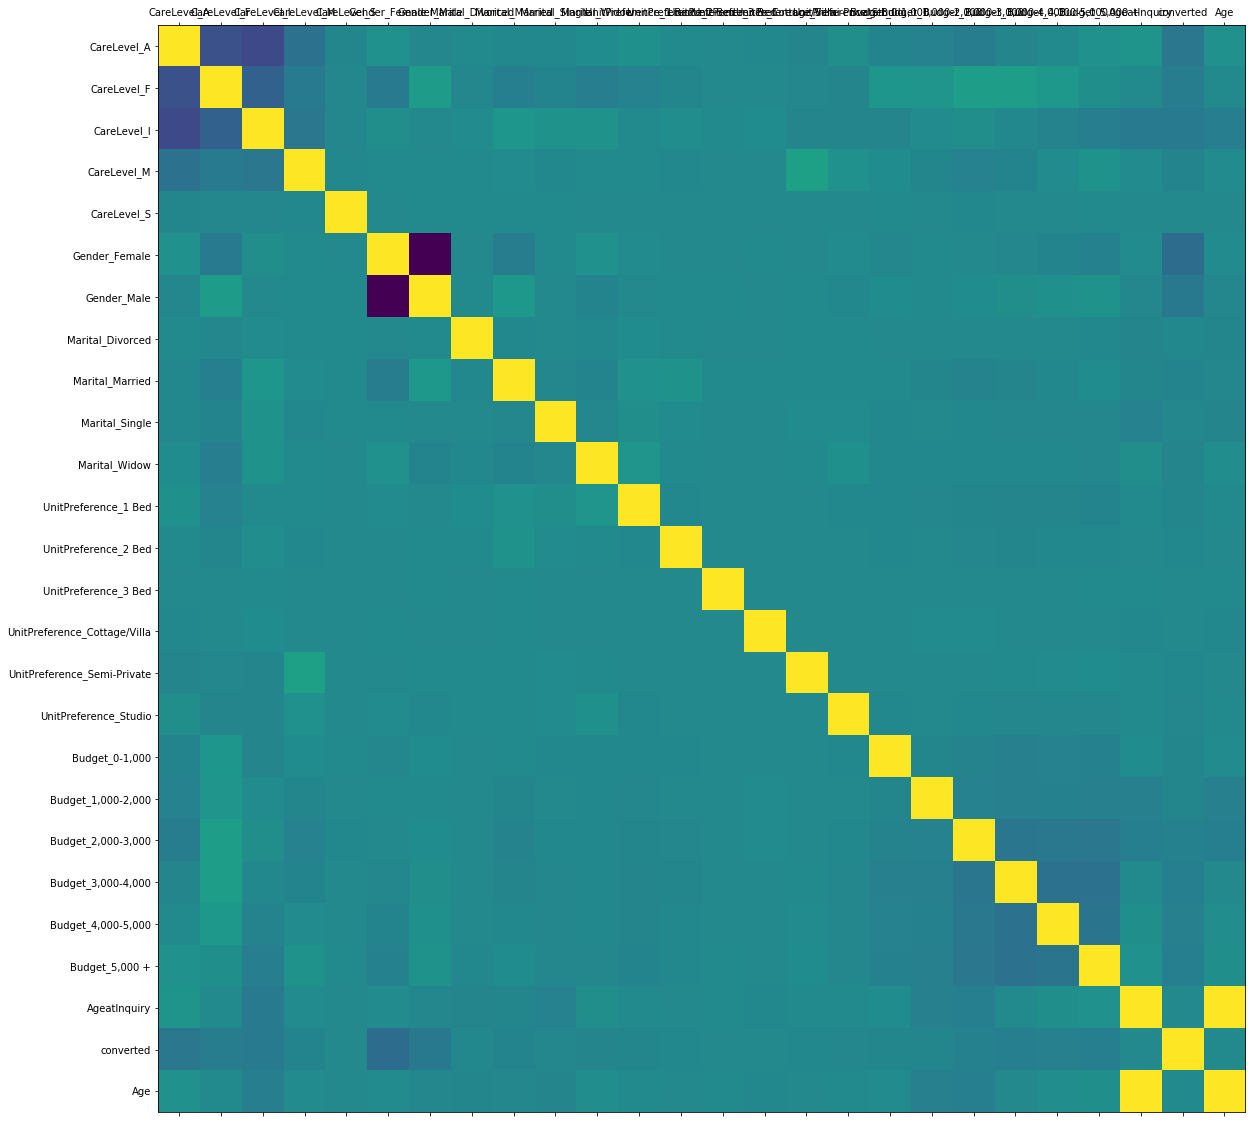

In [228]:
plot_corr(ds13_sub2,20)

In [226]:
ds13_sub2.head()

,CareLevel_A,CareLevel_F,CareLevel_I,CareLevel_M,CareLevel_S,Gender_Female,Gender_Male,Marital_Divorced,Marital_Married,Marital_Single,Marital_Widow,UnitPreference_1 Bed,UnitPreference_2 Bed,UnitPreference_3 Bed,UnitPreference_Cottage/Villa,UnitPreference_Semi-Private,UnitPreference_Studio,"Budget_0-1,000","Budget_1,000-2,000","Budget_2,000-3,000","Budget_3,000-4,000","Budget_4,000-5,000","Budget_5,000 +",AgeatInquiry,converted
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,77.0,0.0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0
